In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('mldataset.csv')

print(data.head())
print(data.info())
print(data.describe())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PATMENT   9839.64  C1231006815         170136       160296.36   
1     1   PAYMENT   1864.28  C1666544295          21249        19384.72   
2     1  TRANSFER    181.00  C1305486145            181            0.00   
3     1  CASH_OUT    181.00   C840083671            181            0.00   
4     1   PAYMENT  11668.14  C2048537720          41554        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0   M197987155               0               0        0               0  
1  M2044282225               0               0        0               0  
2   C553264065               0               0        1               0  
3    C38997010           21182               0        1               0  
4  M1230701703               0               0        0               0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 11 columns):
 #  

In [3]:

data.dropna(inplace=True)


label_encoder = LabelEncoder()
data['type'] = label_encoder.fit_transform(data['type'])
data['nameOrig'] = label_encoder.fit_transform(data['nameOrig'])
data['nameDest'] = label_encoder.fit_transform(data['nameDest'])


scaler = StandardScaler()
data[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']] = \
    scaler.fit_transform(data[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']])

In [4]:
X = data.drop('isFraud', axis=1)
y = data['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [7]:
y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



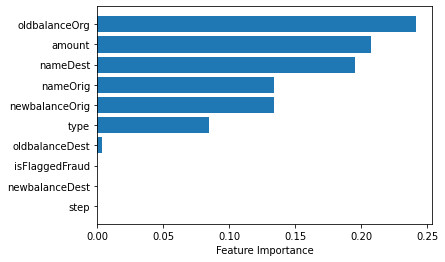

In [8]:
importance = classifier.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(importance)

plt.barh(range(len(feature_names)), importance[sorted_indices])
plt.yticks(range(len(feature_names)), feature_names[sorted_indices])
plt.xlabel('Feature Importance')
plt.show()